In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import random
import time

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [ ]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table

array([[0.53978334, 0.46381952, 0.48474177, 0.47632855],
       [0.14360694, 0.07577816, 0.07763992, 0.4562955 ],
       [0.32037842, 0.15702875, 0.10038528, 0.11171419],
       [0.06704233, 0.        , 0.        , 0.        ],
       [0.56105135, 0.4491589 , 0.36306938, 0.28322938],
       [0.        , 0.        , 0.        , 0.        ],
       [0.12008908, 0.14515683, 0.23086658, 0.0538632 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.43040493, 0.49635847, 0.44383836, 0.63053818],
       [0.44353291, 0.69465043, 0.2685215 , 0.40340973],
       [0.65073163, 0.32813263, 0.25211442, 0.32922445],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.3320546 , 0.52537621, 0.80381209, 0.55164015],
       [0.73353265, 0.87003349, 0.73385537, 0.71133221],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
sum(rewards_all)

11912.0

In [ ]:
sum(rewards_all[0:1000])

82.0

In [ ]:
sum(rewards_all[1000:2000])

254.0

In [ ]:
sum(rewards_all[2000:3000])

533.0

In [ ]:
sum(rewards_all[9000:10000])

661.0

In [ ]:
sum(rewards_all[19000:20000])

649.0

In [ ]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [ ]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')
    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [ ]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    print(q_table.shape)
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [ ]:
play_multiple_times(env, q_table, 1000)

(16, 4)
Number of successes: 731/1000
Average number of steps: 38.04651162790697


In [ ]:
# play(env, q_table, render=True)

In [ ]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

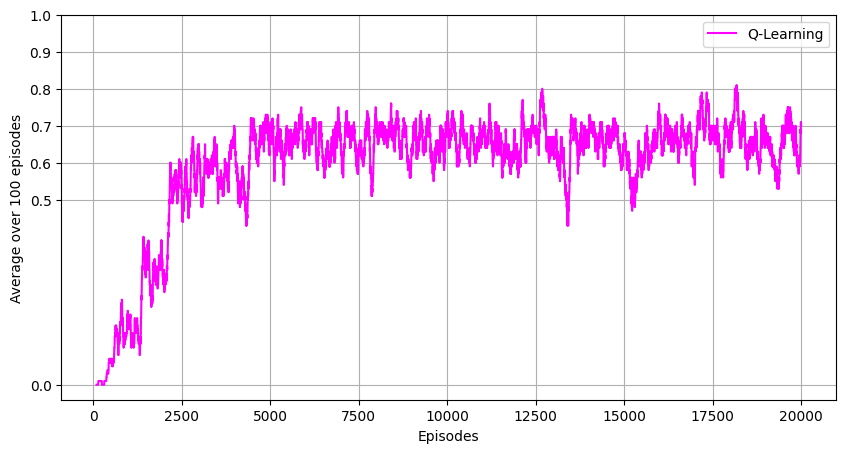

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# BÀI LÀM

In [ ]:
#thêm môi trường
env1=gym.make('FrozenLake8x8-v1', render_mode="rgb_array")
env2=gym.make('Taxi-v3', render_mode="rgb_array")

**Thuật toán SARSA**


In [ ]:
def SARSA(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):

            next_state, reward, terminated, truncated, _ = env.step(action)
            if random.uniform(0,1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action=next_action

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
q_table_s, rewards_all_s = SARSA(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table_s

array([[0.4858478 , 0.46237844, 0.47464294, 0.47433041],
       [0.31735348, 0.31395507, 0.27223784, 0.45639475],
       [0.38419853, 0.37904879, 0.36552084, 0.43763765],
       [0.25761194, 0.31560769, 0.23618379, 0.41073753],
       [0.51146489, 0.3849991 , 0.32060603, 0.40571388],
       [0.        , 0.        , 0.        , 0.        ],
       [0.28378378, 0.11096521, 0.15805988, 0.08594184],
       [0.        , 0.        , 0.        , 0.        ],
       [0.33232485, 0.39190503, 0.46727485, 0.54329214],
       [0.38116509, 0.58084974, 0.36758598, 0.4026782 ],
       [0.55187509, 0.40672718, 0.37571091, 0.2516923 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.48917316, 0.52524458, 0.65109764, 0.5616933 ],
       [0.7235249 , 0.80976111, 0.74324693, 0.73117346],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
play_multiple_times(env, q_table_s, 1000)

(16, 4)
Number of successes: 719/1000
Average number of steps: 37.94993045897079


In [ ]:
average_y_s = []
for ind in range(len(rewards_all_s) - window + 1):
    average_y_s.append(np.mean(rewards_all_s[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_s.insert(0, np.nan)

**Đồ thị minh họa hiệu năng của SARSA với Q-Learning trong môi trường 'FrozenLake-v1'**


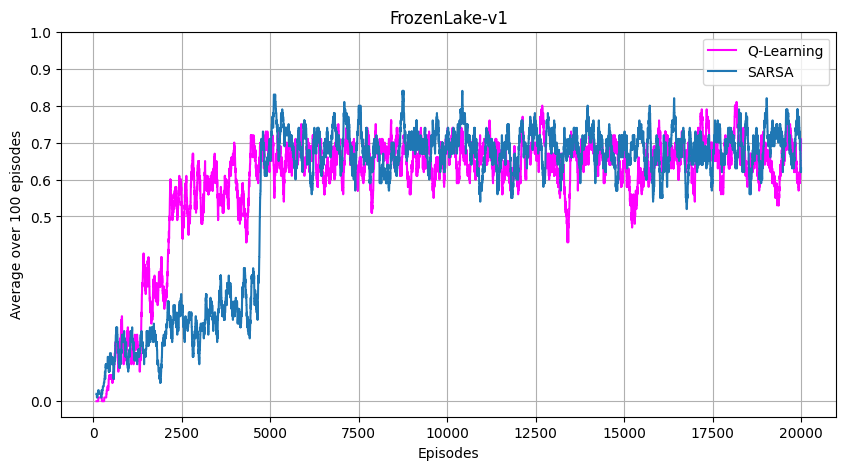

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_s)), average_y_s, label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('FrozenLake-v1')
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

**Nhận xét:** Từ đồ thị ta thấy Q-Learning có xu hướng đạt hiệu suất cao hơn SARSA trong giai đoạn đầu nhưng cũng có biến động lớn hơn. SARSA thể hiện sự ổn định tốt hơn và ít biến động hơn trong giai đoạn sau của quá trình huấn luyện. Trong dài hạn, cả hai thuật toán đều đạt hiệu suất tương đương nhau. Điều này phản ánh rằng trong môi trường có nhiều tính ngẫu nhiên như FrozenLake, SARSA có thể có lợi thế do tính chất on-policy của nó, giúp tránh được các trạng thái rủi ro và biến động lớn.

In [ ]:
print(env2.spec.max_episode_steps)

200


In [ ]:
q_table_1, rewards_all_1 = q_learning(env1, 60000, 200, 0.07, gamma, max_epsilon, 0.001, 0.0001)

Episode 59999 finished


In [ ]:
q_table_1

array([[3.77133682e-01, 3.81439572e-01, 3.78689093e-01, 4.16215665e-01],
       [3.89638891e-01, 3.95350016e-01, 4.25547487e-01, 3.86468338e-01],
       [4.03927579e-01, 4.04219502e-01, 4.47321185e-01, 4.07586133e-01],
       [4.31588059e-01, 4.35404531e-01, 4.78062696e-01, 4.29262527e-01],
       [4.49047159e-01, 4.42786514e-01, 5.02735961e-01, 4.51325507e-01],
       [4.72285662e-01, 4.69040199e-01, 5.29359170e-01, 4.73526052e-01],
       [5.02854862e-01, 4.90499278e-01, 5.43619331e-01, 4.97682241e-01],
       [4.98873123e-01, 4.95782403e-01, 5.48638659e-01, 5.01835007e-01],
       [3.68053228e-01, 3.69666067e-01, 3.72852039e-01, 4.09319083e-01],
       [3.79741958e-01, 3.81883923e-01, 3.82553639e-01, 4.16558461e-01],
       [3.92650004e-01, 3.88447469e-01, 3.94397704e-01, 4.40025539e-01],
       [3.13832965e-01, 2.57020825e-01, 3.86149336e-01, 4.63607569e-01],
       [4.29653021e-01, 4.24331229e-01, 4.37647031e-01, 4.89148593e-01],
       [4.65490135e-01, 4.61550485e-01, 5.13924850e

In [ ]:
play_multiple_times(env1, q_table_1, 1000)

(64, 4)
Number of successes: 866/1000
Average number of steps: 82.31524249422633


In [ ]:
window = 100
average_y_1 = []
for ind in range(len(rewards_all_1) - window + 1):
    average_y_1.append(np.mean(rewards_all_1[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_1.insert(0, np.nan)

In [ ]:
q_table_s1, rewards_all_s1 = SARSA(env1, 60000, 200, 0.07, gamma, max_epsilon, 0.001, 0.0001)

Episode 59999 finished


In [ ]:
q_table_s1

array([[3.88698423e-01, 3.87459690e-01, 3.96805662e-01, 3.88482340e-01],
       [3.82128680e-01, 3.91340288e-01, 4.09267307e-01, 3.90233189e-01],
       [4.00221937e-01, 4.04512771e-01, 4.31505839e-01, 4.02249836e-01],
       [4.17100439e-01, 4.18281834e-01, 4.58390393e-01, 4.21339239e-01],
       [4.34886597e-01, 4.36722809e-01, 4.80883537e-01, 4.39275542e-01],
       [4.73800193e-01, 4.70308777e-01, 5.09784740e-01, 4.59138102e-01],
       [4.86631581e-01, 4.94672367e-01, 5.31465378e-01, 4.95332287e-01],
       [5.05120300e-01, 4.92891844e-01, 5.33059619e-01, 4.96163795e-01],
       [3.60256024e-01, 3.56719898e-01, 3.54525774e-01, 3.94690399e-01],
       [3.67514838e-01, 3.72198262e-01, 3.76859865e-01, 4.05184851e-01],
       [3.73659923e-01, 3.79482547e-01, 3.73689768e-01, 4.21613047e-01],
       [2.79921467e-01, 2.92686616e-01, 2.74014261e-01, 4.39212948e-01],
       [4.23081817e-01, 4.09865660e-01, 4.33993487e-01, 4.63316705e-01],
       [4.41218138e-01, 4.44858361e-01, 5.05157661e

In [ ]:
play_multiple_times(env1, q_table_s1, 1000)

(64, 4)
Number of successes: 869/1000
Average number of steps: 89.33947065592635


In [ ]:
average_y_s1 = []
for ind in range(len(rewards_all_s1) - window + 1):
    average_y_s1.append(np.mean(rewards_all_s1[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_s1.insert(0, np.nan)

**Đồ thị minh họa hiệu năng của SARSA với Q-Learning trong môi trường 'FrozenLake8x8-v1'**


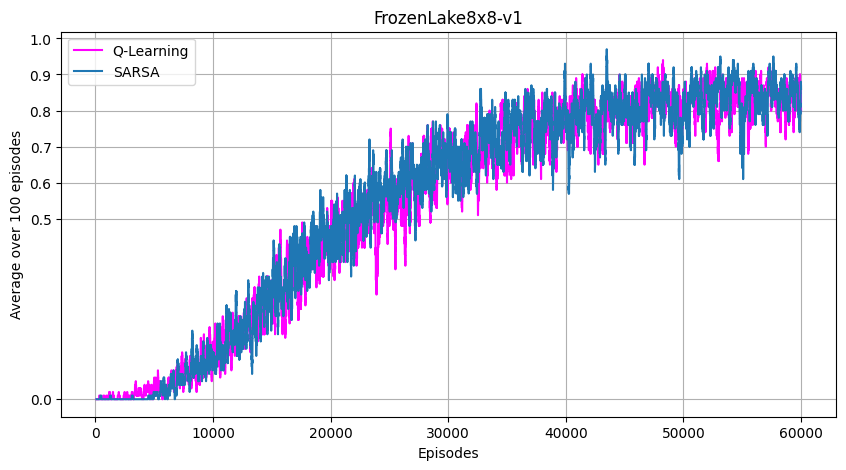

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_1)), average_y_1, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_s1)), average_y_s1, label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('FrozenLake8x8-v1')
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

**Nhận xét:** Trong môi trường FrozenLake8x8-v1, ta thấy cả 2 thuật toán đều hội tụ khá chậm. SARSA có phần ổn định hơn, trong khi đó Q-learning hơi biến động hơn. Với SARSA sẽ phù hợp với các môi trường có nhiều rủi ro, nơi mà chiến lược thận trọng được ưa chuộng, còn Q-Learning có khả năng khám phá nhiều hơn nhưng với mức biến động cao hơn.

In [ ]:
q_table_2, rewards_all_2 = q_learning(env2, 4000, 200, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 3999 finished


In [ ]:
q_table_2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-4.56217463, -4.51801071, -4.69657935, -4.57168357,  9.62206969,
        -8.23036655],
       [ 0.38957686, -1.88490559, -2.16043697, -2.02602509, 14.11880599,
        -9.16236164],
       ...,
       [-1.21497092, -0.40296518, -1.1626809 , -1.61077594, -6.43346161,
        -5.41158459],
       [-2.34660538, -2.34146728, -2.32935217, -2.3808397 , -6.95411782,
        -7.96931015],
       [-0.04018816, -0.20881   , -0.13018816,  5.61765045,  0.        ,
        -0.94018816]])

In [ ]:
play_multiple_times(env2, q_table_2, 1000)

(500, 6)
Number of successes: 1000/1000
Average number of steps: 13.189


In [ ]:
average_y_2 = []
for ind in range(len(rewards_all_2) - window + 1):
    average_y_2.append(np.mean(rewards_all_2[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_2.insert(0, np.nan)

In [ ]:
q_table_s2, rewards_all_s2 = SARSA(env2, 4000, 200, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 3999 finished


In [ ]:
q_table_s2

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -6.18281792,  -5.95344033,  -5.95800063,  -5.99019861,
          9.21018905, -10.52540832],
       [ -3.82682874,  -3.18784673,  -3.13016784,  -2.38319182,
         13.56158278,  -7.89968294],
       ...,
       [ -1.66795959,  15.1201314 ,  -1.68473266,  -1.72393845,
         -4.86090748,  -5.83818985],
       [ -4.67162693,  -4.65508304,  -4.80604047,  -4.72190828,
         -9.28258136,  -9.47901094],
       [ -0.40520375,  -0.76805917,  -0.433261  ,   7.72927251,
         -4.92548449,  -3.14156458]])

In [ ]:
play_multiple_times(env2, q_table_s2, 1000)

(500, 6)
Number of successes: 1000/1000
Average number of steps: 13.222


In [ ]:
average_y_s2 = []
for ind in range(len(rewards_all_s2) - window + 1):
    average_y_s2.append(np.mean(rewards_all_s2[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_s2.insert(0, np.nan)

**Đồ thị minh họa hiệu năng của SARSA với Q-Learning trong môi trường 'Taxi-v3'**


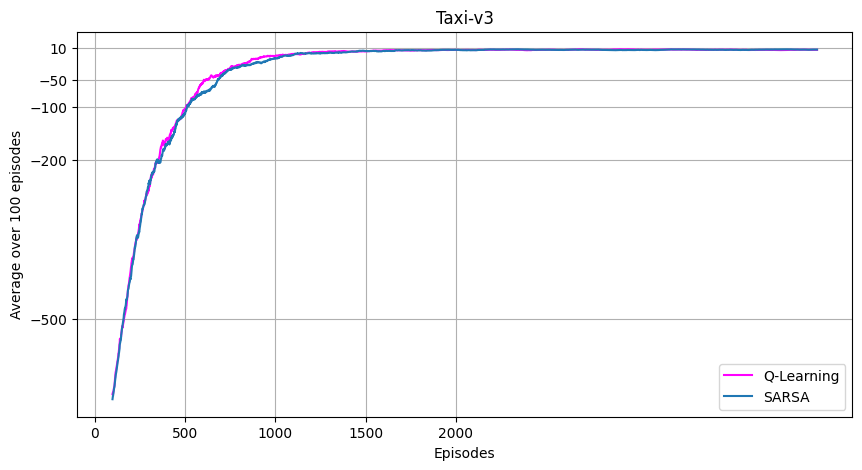

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_2)), average_y_2, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_s2)), average_y_s2, label='SARSA')
plt.xticks([0, 500, 1000, 1500, 2000])
plt.yticks([-500, -200, -100, -50, 10])
plt.title('Taxi-v3')
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

**Nhận xét:** Từ đồ thị, ta có thể thấy rằng trong môi trường Taxi-v3, cả Q-Learning và SARSA đều hoạt động tốt và cho hiệu suất tương đương nhau. Cả hai thuật toán đều hội tụ nhanh chóng và đạt được hiệu suất ổn định sau một số tập nhất định.